# The Sparks Foundation 
 BATCH : (GRIPJUNE-21)
# The GRIP (Graduate Rotational Internship Program)

DOMAIN : DATA SCIENCE AND BUSINESS ANALYTICS

# NAME OF CANDIDATE : SURAJKUMAR SONDAGAR
 TASK 6 : PREDICTING IRIS DATASET USING DECISION TREE MODEL

# 1) Importing basic libraries:


In [1]:
import pandas as pd    #for data preprocessing
import numpy as np     #for linear algebra
import matplotlib.pyplot as plt   #for data visualisation
import seaborn as sns      #for data visualisation

HELLO EVERYONE!!!

I use a very basic approach for analysing the data of iris dataset using EDA(Exploratory Data Analysis).First i visualize data with the help of Matplotlib and Seaborn libraries and then apply Desicion Tree ML algorithms for predictions:

-> Decision Tree Regression

## 2)  Load the Dataset

In [2]:
data = pd.read_csv('Iris.csv')     

data.head()  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3) Analysing the Dataset

for checking if there are null values or inconsistent datatype in dataset.
as we can see there are no NA values so there is no need of preprocessing.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Drop the first column as it doesn't have any information

In [4]:
data.drop('Id',axis = 1,inplace = True)        #Drop the first column as it doesn't have any information.
data.head(3)             

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


checking the number of class in target(species column).
As we can see, there are 50 values of each type of species class.

In [5]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

So this is to ensure that there is not data it has null value or any invalid features value.

In [6]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now, We Can Go ahead for Data visualization to sure the relationship every features 

# 4) Data Visualization

For Visualizing the Iris Dataset we are using most useful packages or libraries of Data science. we are not going in deeper for this dataset.
1) Matplolib: It is a very powerful plotting library useful for those working with Python and NumPy. And for making statistical interference, it becomes very necessary to visualize our data and Matplotlib is the tool that can be very helpful for this purpose. It provides MATLAB like interface only difference is that it uses Python and is open source.



2) Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

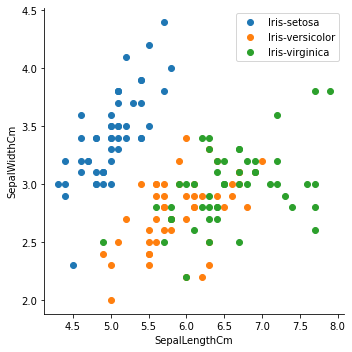

In [7]:
sns.FacetGrid(data, hue='Species',height= 5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')
plt.legend()
plt.show()

The above graph shows distribution of different species on the basis of sepal length and sepal width.It can be seen that setosa can be classify on the basis of these two features but other two classes are overlap with each other.Lets try with other remaining features

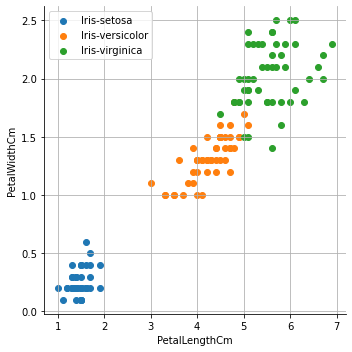

In [8]:
sns.FacetGrid(data, hue='Species',height= 5).map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm')
plt.legend()
plt.grid()
plt.show()

Petal length and petal width gives us a more clean plot than using sepal features.This means that petal features can help us in acheiving more correct predictions.

# Pair Plots : 
The pair plots gives us relationship between all the features with each other.With the help of these plots we can easily visualise which feature gives us more better predictions.

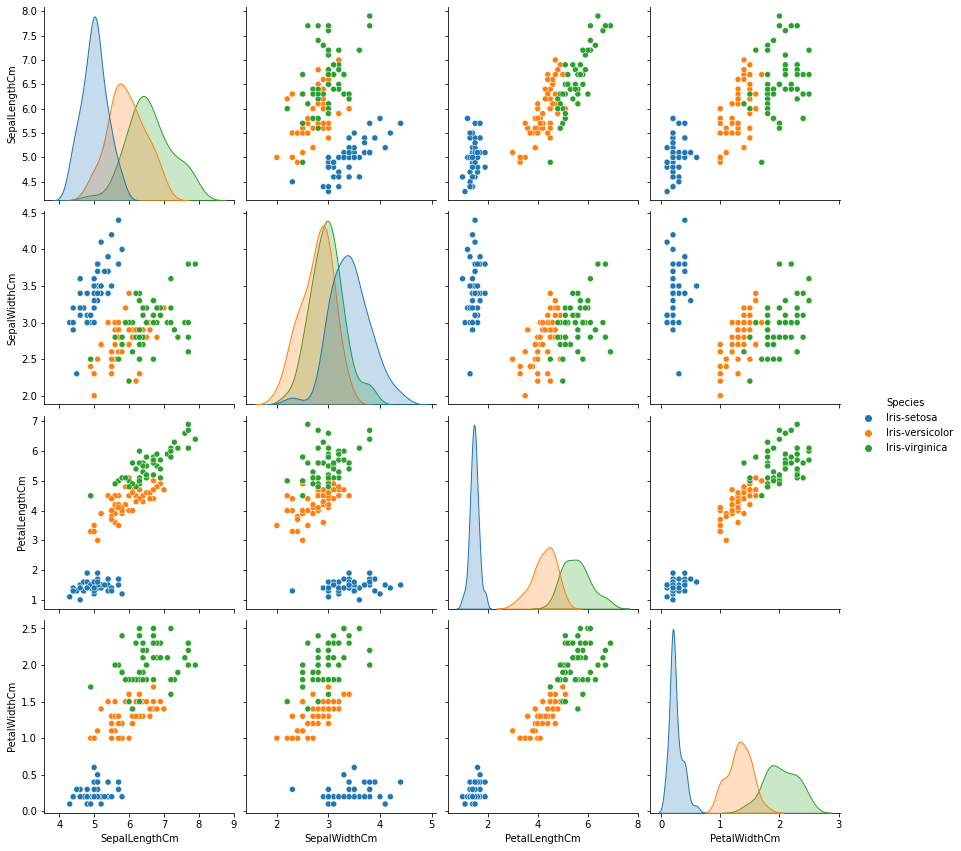

In [9]:
sns.pairplot(data, hue = 'Species',height = 3)
plt.show()

Observations:

By analysing all the plots above, we can see that petal features are being more useful for predictions.Also petal length is fairly good feature than petal width.



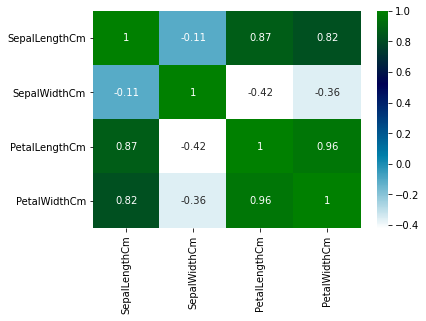

In [10]:
sns.heatmap(data.corr(),cmap='ocean_r',annot=True)
plt.show()

Above graph shows that petal length and width have a better correlation between them.

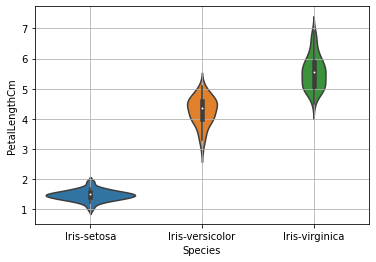

In [11]:
sns.violinplot(data = data ,x ='Species',y = 'PetalLengthCm', height= 15)
plt.grid()
plt.show()

The violin plot shows the probablity density of each class.It also consist box plots at the centre of the curves.The white dot in the middle of the box plot shows 50th percentile of each class.The thinner the curve ,the lower is the probablity density.

# BUILDING THE MODEL:-
I use the Decision tree ML algorithms for prediction:

According to above visualisation, i use only petals features as they tends to give better result,



Importing the libraries for Machine learning by Using Sci-kit Learn ( sklearn )

In [12]:
from sklearn.model_selection import train_test_split          #to split the training and test
from sklearn.tree import DecisionTreeClassifier               #for DecisionTree algorithm
from sklearn.metrics import confusion_matrix, accuracy_score  #for calculating accuracy
from sklearn.preprocessing import StandardScaler              #Standardize features by removing the mean and 
                                                              #scaling to unit variance

In [13]:
x_train = data.iloc[:,2:4].values         #taking petal length and petal width features values

y_train = data.iloc[:,4].values           #taking the target values

Splitting the dataset into training data and testing data(25%)

In [14]:
training_x, test_x, training_y, test_y = train_test_split(x_train, y_train, test_size = .25, random_state =0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(test_x)

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

prediction_y = model.predict(test_x)

print(confusion_matrix(test_y, prediction_y))
print('\n')
print('Accuracy score:',accuracy_score(test_y,prediction_y))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


Accuracy score: 1.0


In [25]:
data = pd.DataFrame({'Actual': test_y, 'Predicted': prediction_y}) 
data

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(test_y, prediction_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



Observations:

Petals features gives more accurate predictions than sepals as shown by heatmap correlations and by applying Decison Tree Algorithm we verify it.